𝑥_𝑖 (𝑡),𝑥_𝑗 (𝑡) ∈ [0,1]  Opinions of individuum 𝑥_𝑖 and its neighbors
𝑥_𝑖𝑗 (𝑡) = 𝑥_𝑗 (𝑡) - 𝑥_𝑖 (𝑡)  ∈ [-1,1]  difference of opinion
𝑤_𝑖𝑗 ∈ [0,1]  social influence parameter (edge weights, allows unsymmetrical influence)
𝛼_𝑖 ∈ [0,+…]  controversy  of the topic (nonlinearity parameter,)
𝜌_𝑖 ∈ [0,1]  max opinion difference before repulsion
𝛽_𝑖  coupling strength (stubborn agents)


In [111]:
import networkx as nx
import matplotlib.pyplot as plt
#from icecream import ic
#ic.configureOutput(includeContext=True, contextAbsPath=True)


import numpy as np
import random

class Environment:
    def __init__(self):
        self.graph = nx.Graph()  # Undirected graph

    def add_agent(self, agent):
        """Add an agent as a node in the graph."""
        self.graph.add_node(agent.id, agent=agent)

    def add_connection(self, agent1_id, agent2_id, weight=1):
        """Add a connection (edge) between two agents with a weight."""
        self.graph.add_edge(agent1_id, agent2_id, weight=weight)    


In [112]:
class Agent:
    def __init__(self, agent_id):
        self.agent_id = agent_id
        self.opinion = None
        self.beta =  None #coupling_strength
        self.rho = None #threshold of opiniondifferences
        self.alpha = None #controversity of the topic



    #def opinionupdate (self)

    def step(self, environment):
        # Calculate the opinion of the agent
        neighbors = environment.graph.neighbors(self.agent_id)  # Get neighbors of the agent
        #neighbor_opinions = [environment.graph.nodes[neighbor]['agent'].opinion for neighbor in neighbors] # Get opinions of neighbors
        weights = [environment.graph[self.agent_id][neighbor]['weight'] for neighbor in environment.graph.neighbors(self.agent_id)]
        opinion_fraction = 0.00
   
        for number, neighbor in enumerate(neighbors):
            neighbor_agent = environment.graph.nodes[neighbor]['agent']
            weight = environment.graph[self.agent_id][neighbor].get('weight', 1)  # Default weight is 1
            #influence = math.tanh(-neighbor_agent.a * (abs(neighbor_agent.opinion) - neighbor_agent.p))
            opinion_diff = neighbor_agent.opinion - self.opinion
            print(f'opinion_diff: {opinion_diff}')
            
            opinion_fraction += weight * opinion_diff * np.tanh(- self.alpha * (abs(opinion_diff) - self.rho)) 
            
        
        if weights:  # Avoid division by zero
            self.opinion += self.beta / sum(weights) * opinion_fraction
        if self.opinion > 1:
            self.opinion = 1
        
            
        

In [113]:
class Model:
    def __init__(self, num_agents, connection_probability):
        self.environment = Environment()
        self.agents = []

        # Create agents and add them to the graph
        for i in range(num_agents):
            agent = Agent(i)
            agent.opinion = random.uniform(0,0.8)  # Initial opinion
            agent.beta =  1 #coupling_strength
            agent.rho = 0.7 + random.uniform(0, 0.2) #threshold of opiniondifferences
            agent.alpha = 0.2 + random.uniform(0, 0.2) #controversity of the topic positiv definit
            self.agents.append(agent)
            self.environment.graph.add_node(i, agent=agent)

        # Add edges randomly between nodes
        for i in range(num_agents):
            for j in range(i + 1, num_agents):
                if random.random() < connection_probability:
                    weight = random.uniform(0.1, 1.0)  # Assign a random weight
                    self.environment.graph.add_edge(i, j, weight=weight)

    def step(self):
        for agent in self.agents:
            agent.step(self.environment)

In [114]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_network(environment, layout):
    """
    Visualize the network with a consistent layout.
    
    Args:
        environment: The Environment object containing the graph.
        layout: A dictionary of node positions (precomputed layout).
    """
    # Extract opinions for node colors
    node_colors = [environment.graph.nodes[node]['agent'].opinion for node in environment.graph.nodes]

    # Normalize node colors to match colormap range
    norm = plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw the network using the consistent layout
    nx.draw(
        environment.graph,
        pos=layout,  # Use the precomputed layout
        with_labels=True,
        node_color=[sm.to_rgba(opinion) for opinion in node_colors],
        cmap="coolwarm",
        ax=ax
    )

    # Add the colorbar with the fixed scale
    sm.set_array([])  # Required for the colorbar
    fig.colorbar(sm, ax=ax, label="Opinion (0 to 1)")  # Fixed scale label
    plt.show()


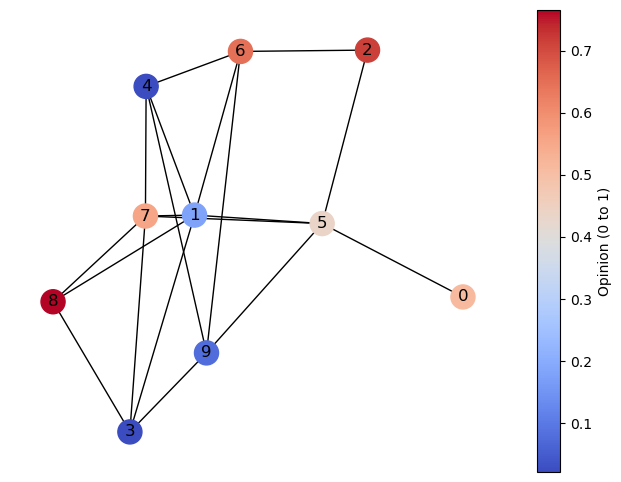

opinion_diff: -0.07558825428373361
opinion_diff: -0.15473081496860194
opinion_diff: -0.15733981477196732
opinion_diff: 0.25738459396351515
opinion_diff: 0.46897577482320313
opinion_diff: 0.37994292547152325
opinion_diff: 0.5872018672463668
opinion_diff: -0.27779046968130305
opinion_diff: -0.06619928882161508
opinion_diff: 0.19041829435218346
opinion_diff: 0.5346737404401252
opinion_diff: 0.7419326822149687
opinion_diff: 0.05353532591631494
opinion_diff: 0.19302729415554884
opinion_diff: 0.6263155895951704
opinion_diff: 0.5372827402434905
opinion_diff: 0.05614432571968032
opinion_diff: 0.0635591388893314
opinion_diff: -0.22169711457993363
opinion_diff: 0.25150953612278804
opinion_diff: 0.1225583315080081
opinion_diff: -0.35858008301580213
opinion_diff: -0.4332882954396216
opinion_diff: 0.03991835526310006
opinion_diff: -0.5982221997613253
opinion_diff: -0.5701712638754901
opinion_diff: -0.34425544608794173
opinion_diff: -0.5204813372672177
opinion_diff: -0.5091893504096454
opinion_diff:

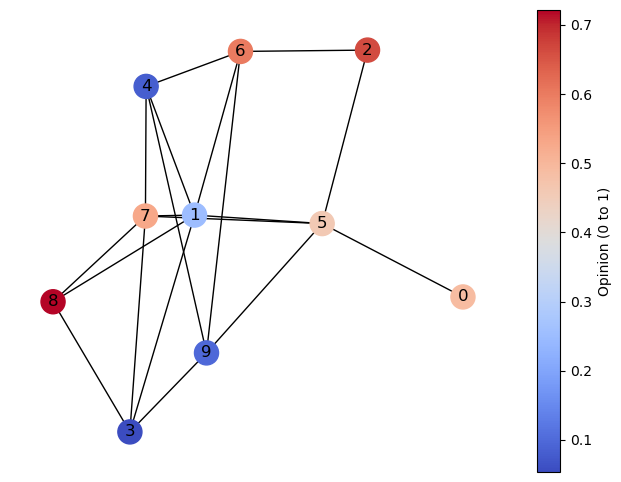

opinion_diff: -0.03184947100737817
opinion_diff: -0.1959450180160824
opinion_diff: -0.16844902010291657
opinion_diff: 0.20977942830895496
opinion_diff: 0.34938531502127473
opinion_diff: 0.2808316946680595
opinion_diff: 0.47198215330801535
opinion_diff: -0.2035364790932288
opinion_diff: -0.06393059238090903
opinion_diff: 0.22948904896652025
opinion_diff: 0.4767767126841419
opinion_diff: 0.6679271713240977
opinion_diff: 0.04191215736044642
opinion_diff: 0.2019930510533544
opinion_diff: 0.5178343351241913
opinion_diff: 0.4492807147709761
opinion_diff: 0.0144161594472806
opinion_diff: 0.02643533258437153
opinion_diff: -0.17623539735851712
opinion_diff: 0.18056029540690577
opinion_diff: 0.07105226635910455
opinion_diff: -0.36381228896459095
opinion_diff: -0.3158412840708369
opinion_diff: 0.040954408694586
opinion_diff: -0.48321600032382417
opinion_diff: -0.5034181756769107
opinion_diff: -0.24728766371762168
opinion_diff: -0.459859902518908
opinion_diff: -0.41466237997060895
opinion_diff: -0

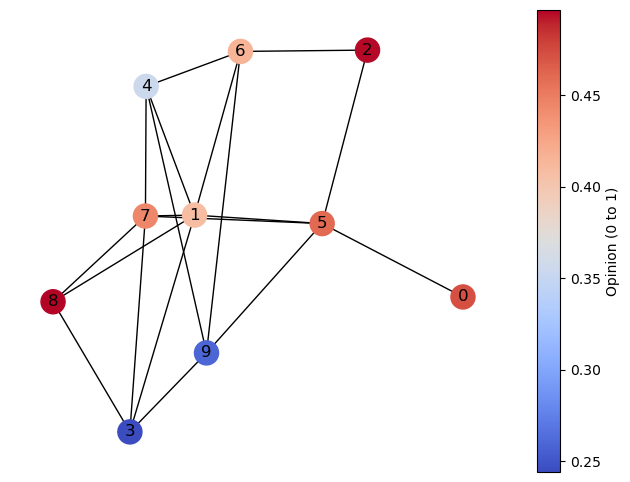

opinion_diff: -0.012169552517939441
opinion_diff: -0.16448843479408645
opinion_diff: -0.05373108721000469
opinion_diff: 0.05168580128796241
opinion_diff: 0.006148967484229828
opinion_diff: 0.03589418269700756
opinion_diff: 0.08791244173524809
opinion_diff: -0.03516598016420497
opinion_diff: -0.08070281396793755
opinion_diff: 0.16524506390092522
opinion_diff: 0.200382617491094
opinion_diff: 0.2524008765293345
opinion_diff: 0.015102582380986912
opinion_diff: 0.05448771631684346
opinion_diff: 0.05988005469423452
opinion_diff: 0.08962526990701225
opinion_diff: -0.09565476520309485
opinion_diff: 0.01004157542928491
opinion_diff: -0.05092917218112364
opinion_diff: 0.025583211568991127
opinion_diff: -0.015791618590954848
opinion_diff: -0.20107165370106195
opinion_diff: -0.005392338377391059
opinion_diff: 0.0711200453727237
opinion_diff: -0.049328537015763674
opinion_diff: -0.15553481989732937
opinion_diff: -0.03513755359016879
opinion_diff: -0.18378196364683602
opinion_diff: -0.07907375222854

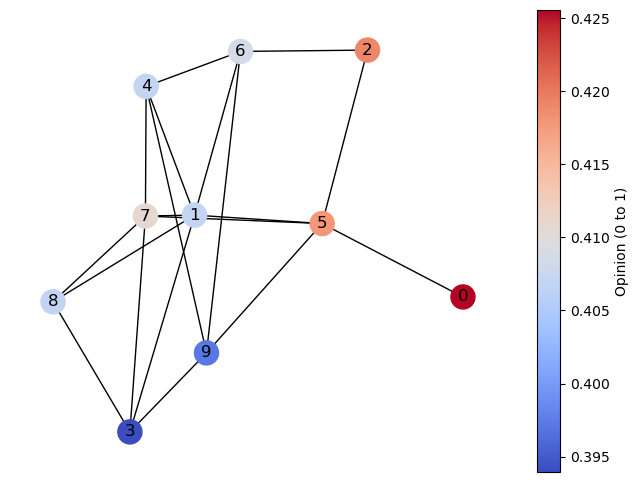

In [118]:
# Initialize the model
num_agents = 10
connection_probability = 0.4
random.seed(42)

model = Model(num_agents, connection_probability)
layout = nx.spring_layout(model.environment.graph)
visualize_network(model.environment, layout)
#random.seed(42)
# Run the simulation
num_steps = 2
for step in range(num_steps):
    #print(f"Step {step}")
    #for agent in model.agents:
        #print(f"Agent {agent.agent_id}: Opinion {agent.opinion}")
    model.step()

print(f"Agent {agent.agent_id}: Opinion {agent.opinion}")
visualize_network(model.environment, layout)

num_steps = 10
for step in range(num_steps):
    #print(f"Step {step}")
    #for agent in model.agents:
        #print(f"Agent {agent.agent_id}: Opinion {agent.opinion}")
    model.step()
print(f"Agent {agent.agent_id}: Opinion {agent.opinion}")
visualize_network(model.environment, layout)
num_steps = 20
for step in range(num_steps):
    #print(f"Step {step}")
    #for agent in model.agents:
        #print(f"Agent {agent.agent_id}: Opinion {agent.opinion}")
    model.step()
print(f"Agent {agent.agent_id}: Opinion {agent.opinion}")
visualize_network(model.environment, layout)

In [116]:
## find issues that fix opinions only growing in value
